In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_csv('Canada_immigration_data_2.csv', index_col =0)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [2]:
df_can.head()

,Unnamed: 0,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,2,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,3,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,4,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 39)


In [4]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [6]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [8]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Unnamed: 0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,5246,3951,4363,3819,2671,2639,2650,3782,7494,7552,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,624194
Asia,4923,31025,34314,30214,24696,27274,23850,28739,43203,47454,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3322717
Europe,4214,39760,44802,42720,24638,22287,20844,24370,46698,54726,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1415161
Latin America and the Caribbean,2722,13081,15215,16769,15427,13678,15171,21179,28471,21924,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,767870
Northern America,217,9378,10030,9074,7100,6661,6543,7074,7705,6469,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241359


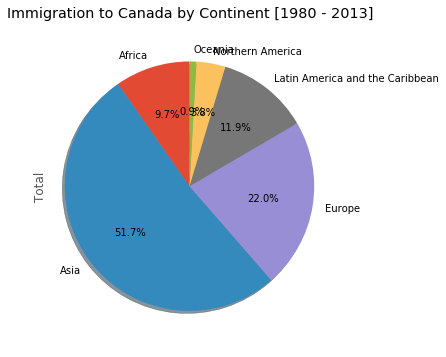

In [11]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

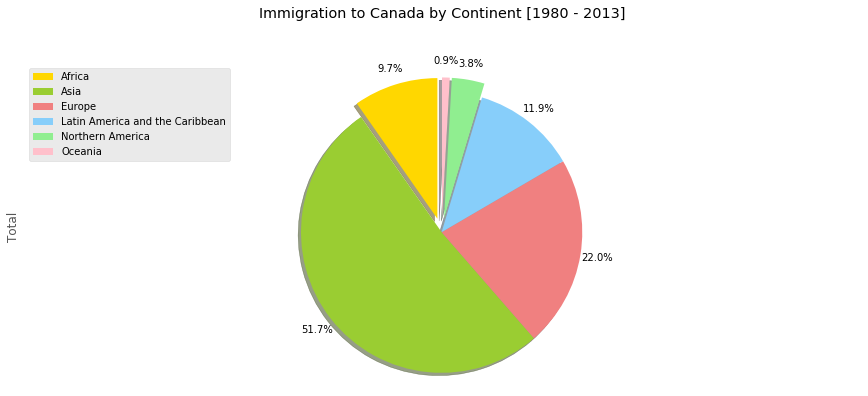

In [12]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 


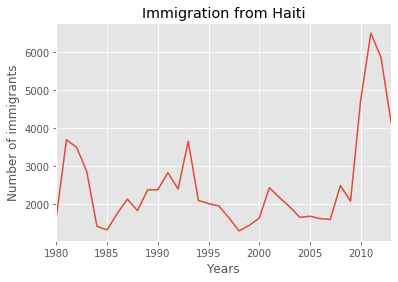

In [12]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

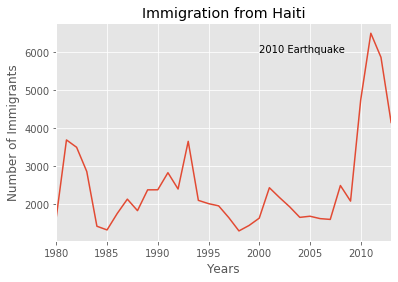

In [13]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 